Text(0.5, 1.0, 'Sharpen')

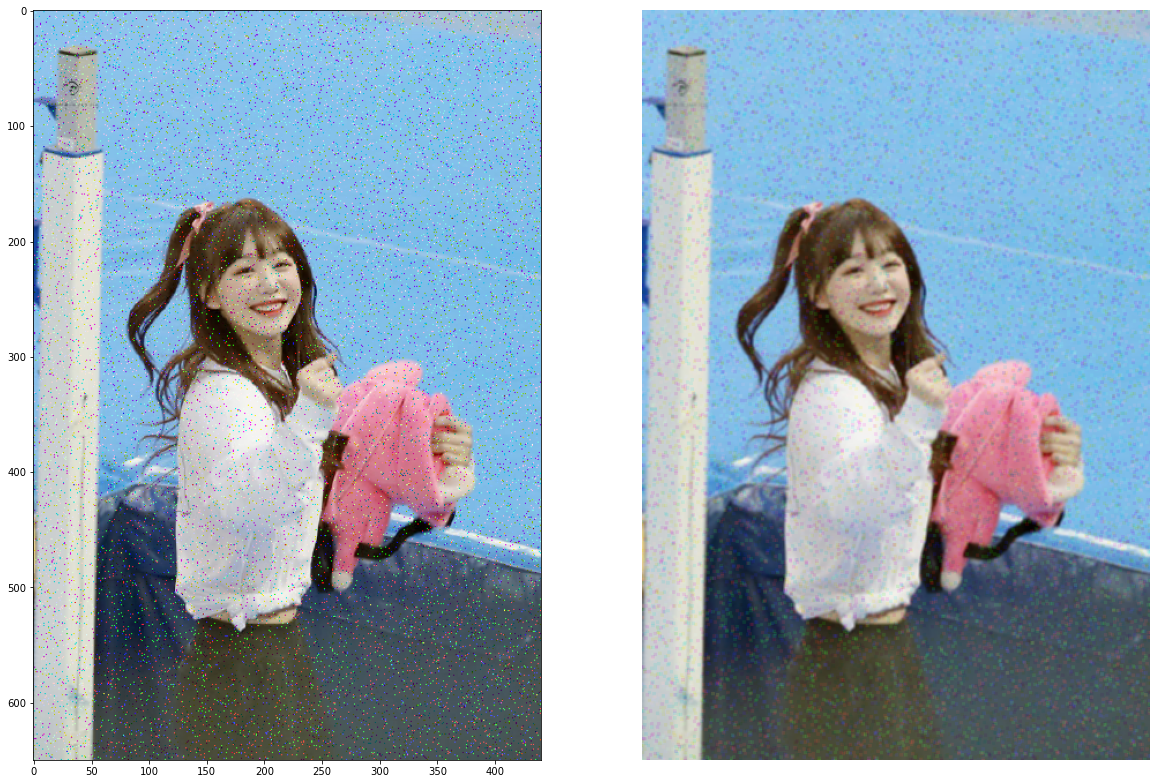

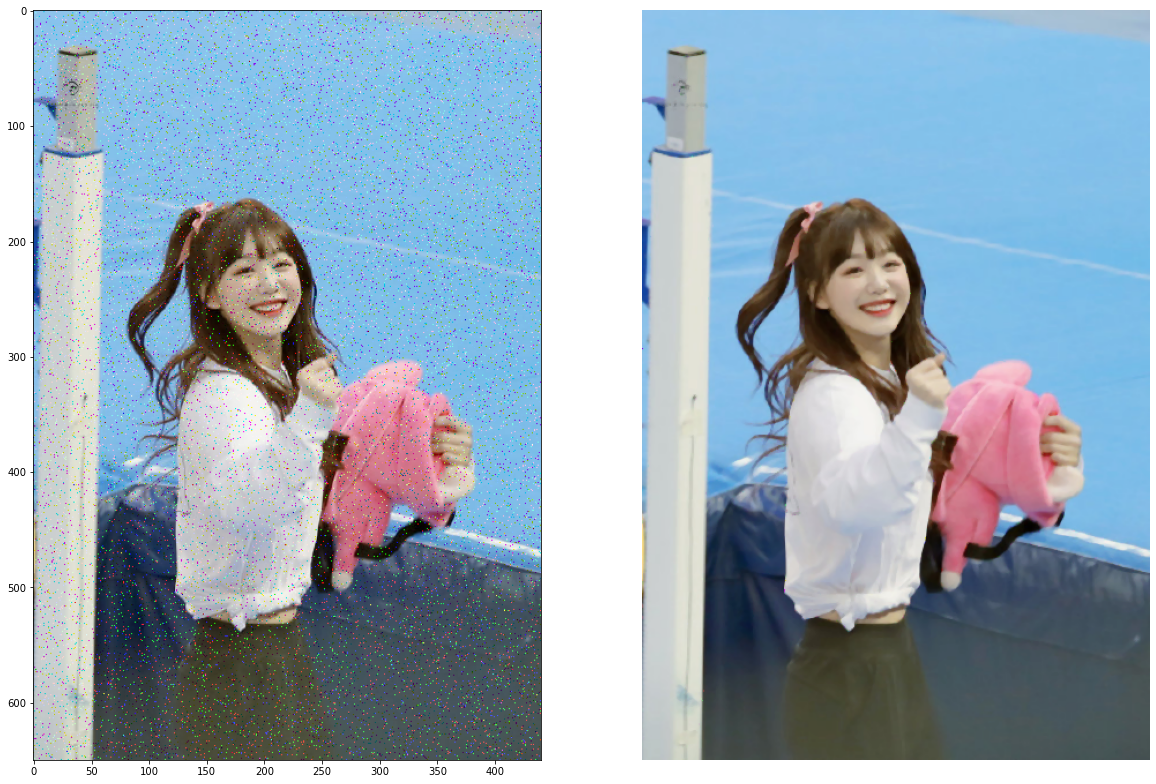

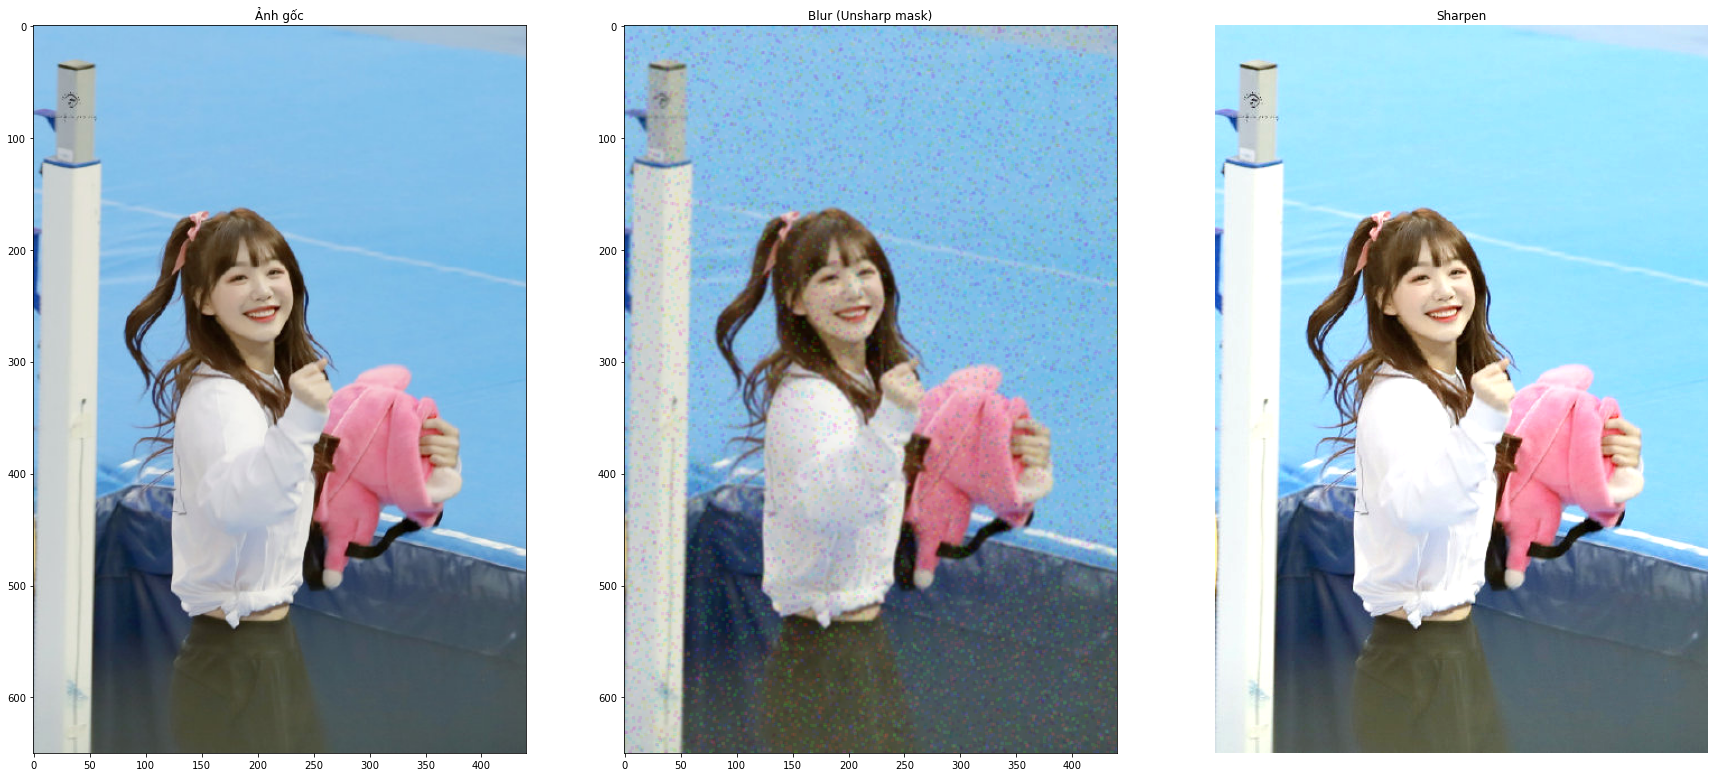

In [1]:
#####Làm mờ (blurring) và làm mịn (smoothing) ảnh đơn giản
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.util import random_noise
#Them nhieu vao anh
img = cv2.imread("Saved Pictures/tmk3.jpg")
#plt.imshow(img,cmap='gray')

#Add salt -and-pepper noise to the image
noise_img = random_noise(img,mode='s&p',amount = 0.03)
#The above function returns a floating -point image on the range[0,1] , thus we changed it to 'uint8' and from [0,255]
noise_img = np.array(255*noise_img, dtype='uint8')
#Display the noise image
#plt.imshow(noise_img)
cv2.imshow('noise',noise_img)
cv2.waitKey(0)

#Bo loc trung binh
kernel = 1/9 * np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])
#averaging for a smoothing effect
fimage = cv2.filter2D(noise_img,-1,kernel)
fig,ax = plt.subplots(1,2,figsize=(20,20))
ax[0].imshow(noise_img[:,:,::-1]);plt.axis("off")
ax[1].imshow(fimage[:,:,::-1]);plt.axis("off")

img_blur = cv2.medianBlur(noise_img,3) # image , kernel size
fig,ax = plt.subplots(1,2,figsize=(20,20))
ax[0].imshow(noise_img[:,:,::-1]);plt.axis("off")
ax[1].imshow(img_blur[:,:,::-1]);plt.axis("off")

#fimage = image *1.7 -0.5*blur+0
fimage1 = cv2.addWeighted(img,1.7,img_blur, -0.5,0)
fig,ax = plt.subplots(1,3,figsize=(30,30))
ax[0].imshow(img[:,:,::-1]);plt.axis("off"); ax[0].set_title("Ảnh gốc")
ax[1].imshow(fimage[:,:,::-1]);plt.axis("off") ; ax[1].set_title("Blur (Unsharp mask)")
ax[2].imshow(fimage1[:,:,::-1]);plt.axis("off") ; ax[2].set_title("Sharpen")